# Photovoltaics calculator

**IMPORTANT:**

**Always consult a qualified engineer or technician.
Do not attempt to install PV systems without technical knowledge. DC current is dangerous and Do-it-yourself installations may result in personal injuries, death, property damages or fire.**

This is a photovoltaics calculator, based on the method exposed in the course of TU-Delft Solar Energy: Photovoltaic (PV) Systems: https://courses.edx.org/courses/course-v1:DelftX+PV3x+1T2020/course/

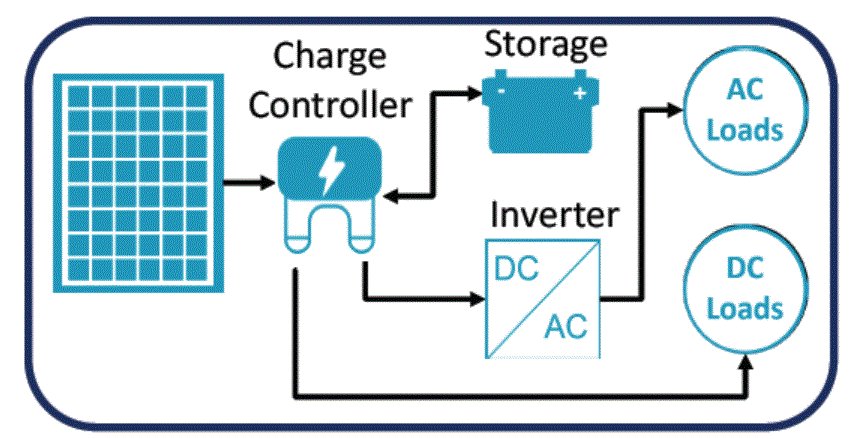

**1. Total Energy of loads**

We compute the total power and energy demanded by the loads in the building.

In [69]:
import pandas as pd


loads = { 'Device':['Lighting LED 12W','Outdoor Lights','Fan','Lamp','Emergency lamp','Other'],
         'Quantity': [22,10,1,1,6,1],
         'Hours_of_Daily_use': [5,12,13,1,3,12],
         'Device_Watts':[12,35,150,18,5,300]            
        }

df = pd.DataFrame(loads, columns = ['Device','Quantity','Hours_of_Daily_use','Device_Watts'])

df


,Device,Quantity,Hours_of_Daily_use,Device_Watts
0,Lighting LED 12W,22,5,12
1,Outdoor Lights,10,12,35
2,Fan,1,13,150
3,Lamp,1,1,18
4,Emergency lamp,6,3,5
5,Other,1,12,300


In [70]:
df['Wh_day'] = df.Quantity * df.Hours_of_Daily_use * df.Device_Watts
df

,Device,Quantity,Hours_of_Daily_use,Device_Watts,Wh_day
0,Lighting LED 12W,22,5,12,1320
1,Outdoor Lights,10,12,35,4200
2,Fan,1,13,150,1950
3,Lamp,1,1,18,18
4,Emergency lamp,6,3,5,90
5,Other,1,12,300,3600


In [71]:
df['Total_Watts'] = df.Quantity * df.Device_Watts
Total_Watts = df.Total_Watts.sum()
print('Total_Watts (W): ',Total_Watts)
Total_Wh_day = df.Wh_day.sum()
print('Total_Wh_day (Wh): ', Total_Wh_day)


Total_Watts (W):  1112
Total_Wh_day (Wh):  11178


**2. PV panel sizing**

We compute the total of PV modules based on the load demand and Equivalent Sun Hours (ESH) of the location.

In [89]:
#User input

V_sys = 48      #System voltage (V)
MPPT = True

#Equivalent Sun Hours of the location, for data in your region see: https://www.nrel.gov/gis/solar.html 
#This value could have units: kWh/m2/day or Hours

ESH = 5.6      #Location: Buenavista, Guajira, Colombia

#PV Module - see module's datasheet
Wp = 325   #Nominal power (W)
Voc = 46   #Open circuit voltage (V)
Vmpp = 37.5 #Voltage at Maximun Power point 


#Charge Controller - see datasheet
Vm = 100    #Maximum Voltage Voc (V)


In [98]:
#PV panel sizing:
import math

Total_Wh_day
SF = 1.2                 #Sizing Factor btw 1.10 - 1.30
Dd = Total_Wh_day * SF   #Daily Demand (Wh)
Pp = Dd / ESH            #Minimum Power Wp
Nm = Pp / Wp             #Total modules required
Ns = Vm / Voc            # Number of series modules
Np = math.ceil(Nm)/math.floor(Ns) #Number of parallel modules

print('Daily Demand(Wh): ', Dd)
print('Minimum Power(Wp): ', Pp)
print('Total modules required: ', math.ceil(Nm))
print('Series modules: ', math.floor(Ns))
print('Parallel modules: ', Np)
print('Total PV power (Wp): ', math.ceil(Nm)*Wp )

Daily Demand(Wh):  13413.6
Minimum Power(Wp):  2395.2857142857147
Total modules required:  8
Series modules:  2
Parallel modules:  4.0
Total PV power (Wp):  2600


**3. Battery sizing**

In [91]:
#User input
DoD = 0.7     #Depth of discharge, btw 0.5 - 0.8
RD = 0.5      #Reserve days
Vb= 12        #Battery voltage (V)
Cb= 100       # Battery capacity (Ah)
Eb= Cb * Vb   #Battery Energy (Wh)

In [100]:
#Battery Sizing

Et = Dd * RD / DoD         #Minimum capacity (Wh) of the Battery Bank
Bt = math.ceil(Et / Eb)    # Total batteries required
Bs = V_sys / Vb            #Batteries in series
Bp = Bt / Bs               #Strings of batteries in parallel, recomended: max. 2
E_bat = Bt * Eb            #Total capacity of the battery bank selected (Wh)
C_bat = E_bat / V_sys      #Total capacity of the battery bank selected (Ah)

print('Minimum capacity (Wh): ', Et)
print('Total batteries required: ', Bt)
print('Batteries in series: ', Bs)
print('Batteries in parallel: ', Bp)
print('Voltage system (VDC): ', V_sys)
print('Total Capacity (Wh) -- (Ah): ', E_bat, C_bat)


Minimum capacity (Wh):  9581.142857142859
Total batteries required:  8
Batteries in series:  4.0
Batteries in parallel:  2.0
Voltage system (VDC):  48
Total Capacity (Wh) -- (Ah):  9600 200.0


**4. Inverter sizing**


In [106]:
#User input - see inverter´s datasheet

PF = 1.0     #Power factor, btw 0.8 - 1.0
eff = 0.88   #Efficiency of inverter
V_inv = 48   #Inverter voltage (V) -- Same as Voltage of battery bank

#Inverter sizing

Pinv = Pp/ (PF*eff)

#type of inverter output - single or three phase:
if Pinv < 5000:
    phase = 'single phase'
else: 
    phase = 'three phase'


print('Inverter size (W): ', math.ceil(Pinv))
print('Inverter voltage (VDC): ', V_inv)
print('Inverter output: ', phase)




Inverter size (W):  2722
Inverter voltage (VDC):  48
Inverter output:  single phase
